In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import re

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [4]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [5]:
mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [6]:
y_true = df.prices_amountmin
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

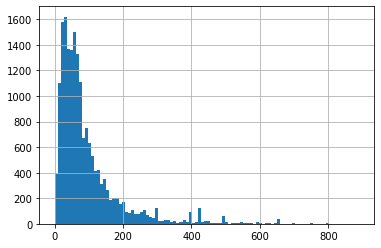

In [7]:
y_true.hist(bins=100)

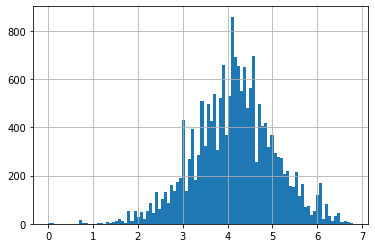

In [8]:
np.log(y_true + 1).hist(bins=100)

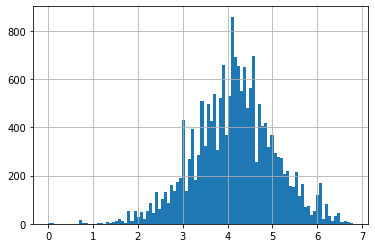

In [9]:
np.log1p(y_true).hist(bins=100)

In [10]:
median_price = np.median(df.prices_amountmin)
median_price

64.95

In [11]:
y_true = df.prices_amountmin
y_pred = [median_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [12]:
y_true = df.prices_amountmin
price_log_mean = np.mean(np.log1p(y_true))
exp_log_mean = np.expm1(price_log_mean)
y_pred = [exp_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [13]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [14]:
df.brand.value_counts()

Nike                 1709
PUMA                  574
Ralph Lauren          524
New Balance           361
VANS                  356
                     ... 
Marvel                  1
Slipperooz              1
NIKE AIR JORDAN I       1
Hanro                   1
MR.CHAOS                1
Name: brand, Length: 1856, dtype: int64

In [15]:
df.brand.factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
df['brand_cat'] = df.brand.factorize()[0]

In [0]:
feats = ['brand_cat']
X = df[feats].values
y = df.prices_amountmin.values

In [18]:
model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df.prices_amountmin.values

  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [20]:
run_model(feats)

(-58.38655694633361, 4.223555478221712)

In [21]:
df.manufacturer.value_counts()

Puma              476
Nike              374
New Balance       249
VANS              170
Reebok            128
                 ... 
Hugo Boss           1
Belvedere Inc       1
Urban Pipeline      1
Montrail            1
Haggar              1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [23]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908596, 4.311223231615436)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 50 columns):
id                     18280 non-null object
asins                  2161 non-null object
brand                  18263 non-null object
categories             18280 non-null object
colors                 10344 non-null object
count                  0 non-null float64
dateadded              18280 non-null object
dateupdated            18280 non-null object
descriptions           9704 non-null object
dimension              2968 non-null object
ean                    9690 non-null float64
features               13299 non-null object
flavors                0 non-null float64
imageurls              17255 non-null object
isbn                   0 non-null float64
keys                   18280 non-null object
manufacturer           6296 non-null object
manufacturernumber     14309 non-null object
merchants              13018 non-null object
name                   18280 non-null object
pric

In [35]:
df.sizes.value_counts()

10                                                         266
11                                                         264
9                                                          233
12                                                         180
8                                                          167
                                                          ... 
10,7,6,5,9,13,14,11,12                                       1
8.5M,9M,11.5M,8M,9.5M,10.5M,7M,7.5M,14M,11M,10M,13M,12M      1
10.5,8.5,11.5,8,13,11                                        1
5.5,7,6,6.5,7.5                                              1
8.5,12.5,9,8,11                                              1
Name: sizes, Length: 1075, dtype: int64

In [0]:
def get_scoring(reviews):
  if reviews is None or reviews is np.nan:
    return 0.0
  scorings = [float(s[0:3]) for s in re.findall( r'\d{1}\.\d{1},', reviews)]
  if len(scorings) == 0:
    return 0.0
  return np.mean(scorings)

def rev_count(reviews):
  if reviews is None or reviews is np.nan:
    return 0
  revs = re.findall( r'dateAdded', reviews)
  return len(revs)

def for_men(categories):
  return 'Men' in categories

def for_women(categories):
  return 'Women' in categories

In [0]:
df['scores'] = df.reviews.apply(get_scoring)
df['rev_cnt'] = df.reviews.apply(rev_count)
df['for_men'] = df.categories.apply(for_men)
df['for_women'] = df.categories.apply(for_women)
df['sizes_cat'] = df.sizes.factorize()[0]

In [30]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [31]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.539304199085976, 4.311223231615441)

In [32]:
run_model(['brand_cat', 'manufacturer_cat', 'scores'])

(-58.90469971128905, 4.06314773717651)

In [33]:
run_model(['brand_cat', 'manufacturer_cat', 'scores', 'rev_cnt'])

(-58.95549878730601, 4.065237449690155)

In [34]:
run_model(['brand_cat', 'manufacturer_cat', 'scores', 'rev_cnt', 'for_men', 'for_women'])

(-58.95664158251559, 4.071331293820458)

In [37]:
run_model(['brand_cat', 'manufacturer_cat', 'scores', 'rev_cnt', 'for_men', 'for_women', 'sizes_cat'])

(-58.992323669112395, 4.167808819276559)